<a href="https://colab.research.google.com/github/BladeArya/phising-url-detection-ml/blob/main/phishing_web_detection_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phishing Website Detection by Machine Learning Techniques**

## **Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.


## **Loading Data:**

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
legitimate_urls = pd.read_csv("https://raw.githubusercontent.com/BladeArya/phising-url-detection-ml/main/extracted_dataset/extracted_legitmate_dataset.csv")
phishing_urls = pd.read_csv("https://raw.githubusercontent.com/BladeArya/phising-url-detection-ml/main/extracted_dataset/extracted_phishing_dataset.csv")

In [ ]:
legitimate_urls.head()

,protocol,domain_name,address,having_ip_address,long_url,shortening_service,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,https_token,age_of_domain,dns_record,web_traffic,domain_registration_length,statistical_report,iframe,mouse_over,label
0,http,graphicriver.net,search?date=this-month&length_max=&length_min=...,0,1,0,0,0,0,0,0,2,0,1,2,0,0,0,0
1,http,ecnavi.jp,redirect/?url=http,0,1,0,0,0,0,0,1,2,0,1,1,0,0,0,0
2,https,hubpages.com,signin?explain=follow+Hubs&url=%2Fhub%2FComfor...,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,http,extratorrent.cc,torrent/4190536/AOMEI+Backupper+Technician+%2B...,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,http,icicibank.com,Personal-Banking/offers/offer-detail.page?id=o...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
phishing_urls.head()

,protocol,domain_name,address,having_ip_address,long_url,shortening_service,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,https_token,age_of_domain,dns_record,web_traffic,domain_registration_length,statistical_report,iframe,mouse_over,label
0,https,monirshouvo.github.io,fb_responsive/,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1
1,http,mjaymu1hetizmtl0aa.filesusr.com,html/c69417_3069841d505568614ed8bca153fc7adf.html,0,1,0,0,0,0,0,0,2,0,1,2,0,1,1,1
2,https,www.arub-service.org,65VATGHD78UJSIAJS88SCID/45678788secure97668909...,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1
3,https,retraiteenaction.ca,irii/banks/SCO/,0,0,0,0,0,0,0,0,0,0,2,1,0,1,1,1
4,https,docs.google.com,forms/d/e/1FAIpQLSeSuqYiwoVF64uJl8EwzQPW-vq7_l...,0,1,0,0,0,0,0,0,2,0,1,2,0,1,1,1


In [ ]:
urldata = pd.concat([legitimate_urls, phishing_urls]).reset_index(drop=True)

In [ ]:
urldata.shape

(2000, 19)

In [ ]:
urldata.head()

,protocol,domain_name,address,having_ip_address,long_url,shortening_service,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,https_token,age_of_domain,dns_record,web_traffic,domain_registration_length,statistical_report,iframe,mouse_over,label
0,http,graphicriver.net,search?date=this-month&length_max=&length_min=...,0,1,0,0,0,0,0,0,2,0,1,2,0,0,0,0
1,http,ecnavi.jp,redirect/?url=http,0,1,0,0,0,0,0,1,2,0,1,1,0,0,0,0
2,https,hubpages.com,signin?explain=follow+Hubs&url=%2Fhub%2FComfor...,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,http,extratorrent.cc,torrent/4190536/AOMEI+Backupper+Technician+%2B...,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,http,icicibank.com,Personal-Banking/offers/offer-detail.page?id=o...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   protocol                    2000 non-null   object
 1   domain_name                 2000 non-null   object
 2   address                     1746 non-null   object
 3   having_ip_address           2000 non-null   int64 
 4   long_url                    2000 non-null   int64 
 5   shortening_service          2000 non-null   int64 
 6   having_@_symbol             2000 non-null   int64 
 7   redirection_//_symbol       2000 non-null   int64 
 8   prefix_suffix_seperation    2000 non-null   int64 
 9   sub_domains                 2000 non-null   int64 
 10  https_token                 2000 non-null   int64 
 11  age_of_domain               2000 non-null   int64 
 12  dns_record                  2000 non-null   int64 
 13  web_traffic                 2000 non-null   int6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b9004fe10>,
      dtype=object)

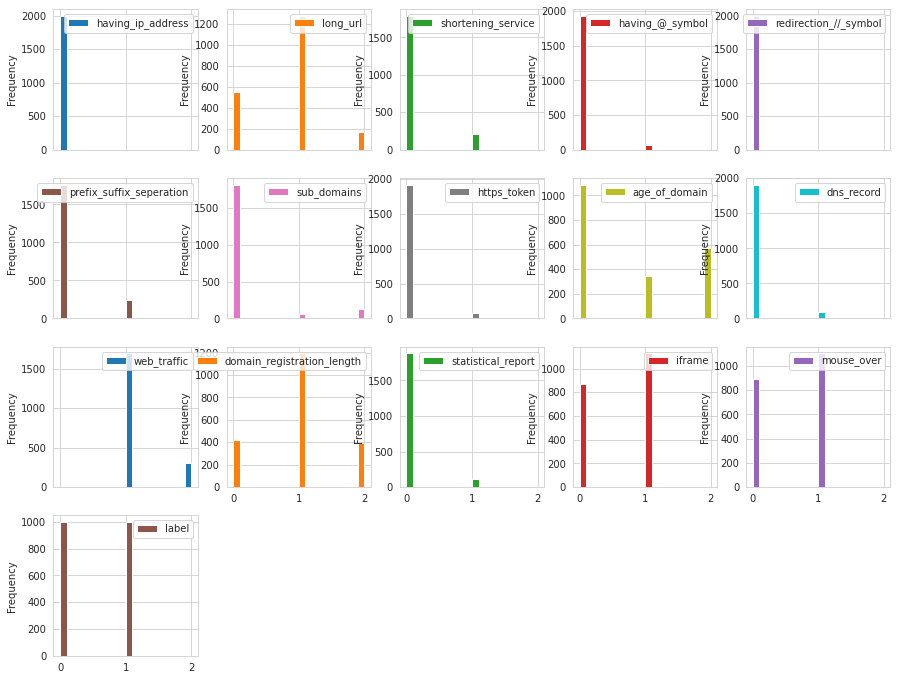

In [ ]:
urldata.plot.hist(subplots=True,layout=(5,5),figsize=(15, 15), bins=20)

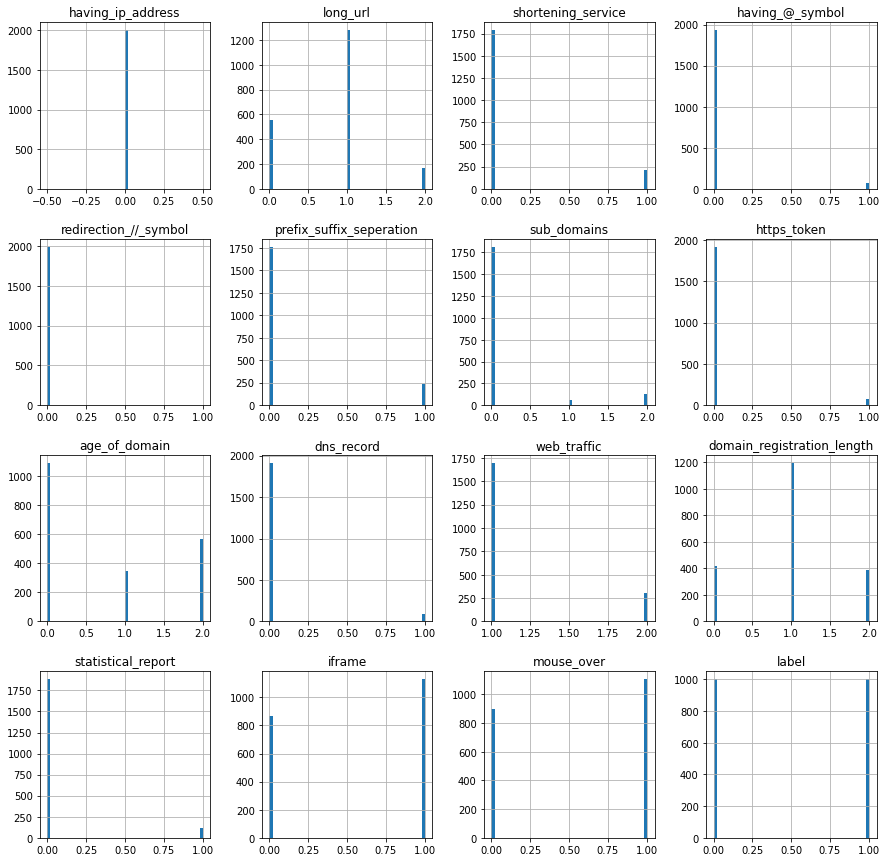

In [ ]:
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

## **Data Preprocessing**

In [ ]:
urldata.describe()

,having_ip_address,long_url,shortening_service,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,https_token,age_of_domain,dns_record,web_traffic,domain_registration_length,statistical_report,iframe,mouse_over,label
count,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,0.0,0.809000,0.106000,0.034500,0.003500,0.11850,0.15300,0.03950,0.740000,0.044500,1.152500,0.986000,0.059000,0.564500,0.55250,0.500000
std,0.0,0.569808,0.307915,0.182555,0.059072,0.32328,0.50271,0.19483,0.872227,0.206255,0.359595,0.634827,0.235684,0.495946,0.49736,0.500125
min,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,0.0,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.500000
75%,0.0,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000
max,0.0,2.000000,1.000000,1.000000,1.000000,1.00000,2.00000,1.00000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
urldata.columns

Index(['protocol', 'domain_name', 'address', 'having_ip_address', 'long_url',
       'shortening_service', 'having_@_symbol', 'redirection_//_symbol',
       'prefix_suffix_seperation', 'sub_domains', 'https_token',
       'age_of_domain', 'dns_record', 'web_traffic',
       'domain_registration_length', 'statistical_report', 'iframe',
       'mouse_over', 'label'],
      dtype='object')

In [ ]:
urldataset = urldata.drop(urldata.columns[[0,1,2]],axis=1).copy()

In [ ]:
urldataset.head()

,having_ip_address,long_url,shortening_service,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,https_token,age_of_domain,dns_record,web_traffic,domain_registration_length,statistical_report,iframe,mouse_over,label
0,0,1,0,0,0,0,0,0,2,0,1,2,0,0,0,0
1,0,1,0,0,0,0,0,1,2,0,1,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
urldataset.isnull().sum()

having_ip_address             0
long_url                      0
shortening_service            0
having_@_symbol               0
redirection_//_symbol         0
prefix_suffix_seperation      0
sub_domains                   0
https_token                   0
age_of_domain                 0
dns_record                    0
web_traffic                   0
domain_registration_length    0
statistical_report            0
iframe                        0
mouse_over                    0
label                         0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed and evades the case of overfitting while model training.
urldataset = urldataset.sample(frac=1).reset_index(drop=True)
urldataset.head()

,having_ip_address,long_url,shortening_service,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,https_token,age_of_domain,dns_record,web_traffic,domain_registration_length,statistical_report,iframe,mouse_over,label
0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0
3,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1


## **Splitting the Data**

In [ ]:
y = urldataset['label']
X = urldataset.drop('label',axis=1)
X.shape, y.shape

((2000, 15), (2000,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((1600, 15), (400, 15))

In [ ]:
y_train.value_counts()

0    806
1    794
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

1    206
0    194
Name: label, dtype: int64

## **Machine Learning Models & Training**
This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree Classifier
* Random Forest Classifier
* XGBoost Classifier
* Support Vector Machines
* K Nearest Neighbours Classifier
* Logistic Regression
* Ada Boost

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
precision=[]
recall=[]
f1=[]
accuracy = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  precision.append(round(a, 3))
  recall.append(round(b, 3))
  f1.append(round(c, 3))
  accuracy.append(round(d, 3))

### **Decision Tree Classifier**

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_pred_tree = tree.predict(X_test)
#y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
#acc_train_tree = accuracy_score(y_train,y_train_tree)
precision_tree = precision_score(y_test,y_pred_tree)
recall_tree = recall_score(y_test,y_pred_tree)
f1_tree = f1_score(y_test,y_pred_tree)
accuracy_tree = accuracy_score(y_test,y_pred_tree)

#print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Precision on test Data: {:.3f}".format(precision_tree))
print("Decision Tree: Recall on test Data: {:.3f}".format(recall_tree))
print("Decision Tree: F-Measure on test Data: {:.3f}".format(f1_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(accuracy_tree))

Decision Tree: Precision on test Data: 0.962
Decision Tree: Recall on test Data: 0.990
Decision Tree: F-Measure on test Data: 0.976
Decision Tree: Accuracy on test Data: 0.975


In [ ]:
#y_test_tree.shape

In [ ]:
storeResults('Decision Tree', precision_tree,recall_tree,f1_tree,accuracy_tree)

### **Random Forest Classifier**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5) 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_pred_forest = forest.predict(X_test)
#y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
precision_forest = precision_score(y_test,y_pred_forest)
recall_forest = recall_score(y_test,y_pred_forest)
f1_forest = f1_score(y_test,y_pred_forest)
accuracy_forest = accuracy_score(y_test,y_pred_forest)

print("Random Tree: Precision on test Data: {:.3f}".format(precision_forest))
print("Random forest: Recall on test Data: {:.3f}".format(recall_forest))
print("Random forest: F-Measure on test Data: {:.3f}".format(f1_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(accuracy_forest))

Random Tree: Precision on test Data: 0.941
Random forest: Recall on test Data: 1.000
Random forest: F-Measure on test Data: 0.969
Random forest: Accuracy on test Data: 0.968


In [ ]:
storeResults('Random Forest', precision_forest,recall_forest,f1_forest,accuracy_forest)

###**XGBoost Classifier**

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [ ]:
#predicting the target value from the model for the samples
y_pred_xgb = xgb.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb = f1_score(y_test,y_pred_xgb)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)

print("XGBoost: Precision on test Data: {:.3f}".format(precision_xgb))
print("XGBoost: Recall on test Data: {:.3f}".format(recall_xgb))
print("XGBoost: F-Measure on test Data: {:.3f}".format(f1_xgb))
print("XGBoost: Accuracy on test Data: {:.3f}".format(accuracy_xgb))

XGBoost: Precision on test Data: 0.976
XGBoost: Recall on test Data: 0.995
XGBoost: F-Measure on test Data: 0.986
XGBoost: Accuracy on test Data: 0.985


In [ ]:
storeResults('XGBoost', precision_xgb,recall_xgb,f1_xgb,accuracy_xgb)

### **Support Vector Machines**

In [ ]:
#Support vector machine model
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_pred_svm = svm.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_svm = precision_score(y_test,y_pred_svm)
recall_svm = recall_score(y_test,y_pred_svm)
f1_svm = f1_score(y_test,y_pred_svm)
accuracy_svm = accuracy_score(y_test,y_pred_svm)

print("SVM: Precision on test Data: {:.3f}".format(precision_svm))
print("SVM: Recall on test Data: {:.3f}".format(recall_svm))
print("SVM: F-Measure on test Data: {:.3f}".format(f1_svm))
print("SVM: Accuracy on test Data: {:.3f}".format(accuracy_svm))


SVM: Precision on test Data: 0.961
SVM: Recall on test Data: 0.966
SVM: F-Measure on test Data: 0.964
SVM: Accuracy on test Data: 0.963


In [ ]:
storeResults('SVM', precision_svm,recall_svm,f1_svm,accuracy_svm)

### **K Nearest Neighbours Classifier**

In [ ]:
#k nearest neighbour model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#predicting the target value from the model for the samples
y_pred_knnc = classifier.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_knnc = precision_score(y_test,y_pred_knnc)
recall_knnc = recall_score(y_test,y_pred_knnc)
f1_knnc = f1_score(y_test,y_pred_knnc)
accuracy_knnc = accuracy_score(y_test,y_pred_knnc)

print("K Nearest Neighbours: Precision on test Data: {:.3f}".format(precision_knnc))
print("K Nearest Neighbours: Recall on test Data: {:.3f}".format(recall_knnc))
print("K Nearest Neighbours: F-Measure on test Data: {:.3f}".format(f1_knnc))
print("K Nearest Neighbours: Accuracy on test Data: {:.3f}".format(accuracy_knnc))

K Nearest Neighbours: Precision on test Data: 0.976
K Nearest Neighbours: Recall on test Data: 0.995
K Nearest Neighbours: F-Measure on test Data: 0.986
K Nearest Neighbours: Accuracy on test Data: 0.985


In [ ]:
storeResults('K Nearest Neighbours', precision_svm,recall_svm,f1_svm,accuracy_svm)

### **Logistic Regression**

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
lr_regression = LogisticRegression(random_state = 0)
lr_regression.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#predicting the target value from the model for the samples
y_pred_lr = lr_regression.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_lr = precision_score(y_test,y_pred_lr)
recall_lr = recall_score(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)
accuracy_lr = accuracy_score(y_test,y_pred_lr)

print("Logistic Regression: Precision on test Data: {:.3f}".format(precision_lr))
print("Logistic Regression: Recall on test Data: {:.3f}".format(recall_lr))
print("Logistic Regression: F-Measure on test Data: {:.3f}".format(f1_lr))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(accuracy_lr))

Logistic Regression: Precision on test Data: 0.962
Logistic Regression: Recall on test Data: 0.990
Logistic Regression: F-Measure on test Data: 0.976
Logistic Regression: Accuracy on test Data: 0.975


In [ ]:
storeResults('Logistic Regression', precision_svm,recall_svm,f1_svm,accuracy_svm)

### **Ada Boost Classifier**

In [ ]:
#ada boost model
from sklearn.ensemble import AdaBoostClassifier
ab_classifier = AdaBoostClassifier(n_estimators=50,random_state=0)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
#predicting the target value from the model for the samples
y_pred_ada = ab_classifier.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_ada = precision_score(y_test,y_pred_ada)
recall_ada = recall_score(y_test,y_pred_ada)
f1_ada = f1_score(y_test,y_pred_ada)
accuracy_ada = accuracy_score(y_test,y_pred_ada)

print("Logistic Regression: Precision on test Data: {:.3f}".format(precision_ada))
print("Logistic Regression: Recall on test Data: {:.3f}".format(recall_ada))
print("Logistic Regression: F-Measure on test Data: {:.3f}".format(f1_ada))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(accuracy_ada))

Logistic Regression: Precision on test Data: 0.972
Logistic Regression: Recall on test Data: 1.000
Logistic Regression: F-Measure on test Data: 0.986
Logistic Regression: Accuracy on test Data: 0.985


In [ ]:
storeResults('Ada Boost', precision_svm,recall_svm,f1_svm,accuracy_svm)

## **Comparison of Model**

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Precision': precision,
    'Recall' : recall,
    'F-Measure':f1,
    'Accuracy': accuracy})

results

,ML Model,Precision,Recall,F-Measure,Accuracy
0,Decision Tree,0.962,0.990,0.976,0.975
1,Random Forest,0.941,1.000,0.969,0.968
2,XGBoost,0.976,0.995,0.986,0.985
3,SVM,0.961,0.966,0.964,0.962
4,K Nearest Neighbours,0.961,0.966,0.964,0.962
5,Logistic Regression,0.961,0.966,0.964,0.962
6,Ada Boost,0.961,0.966,0.964,0.962


In [ ]:
results.sort_values(by=['F-Measure', 'Accuracy'], ascending=False)

,ML Model,Precision,Recall,F-Measure,Accuracy
2,XGBoost,0.976,0.995,0.986,0.985
0,Decision Tree,0.962,0.990,0.976,0.975
1,Random Forest,0.941,1.000,0.969,0.968
3,SVM,0.961,0.966,0.964,0.962
4,K Nearest Neighbours,0.961,0.966,0.964,0.962
5,Logistic Regression,0.961,0.966,0.964,0.962
6,Ada Boost,0.961,0.966,0.964,0.962


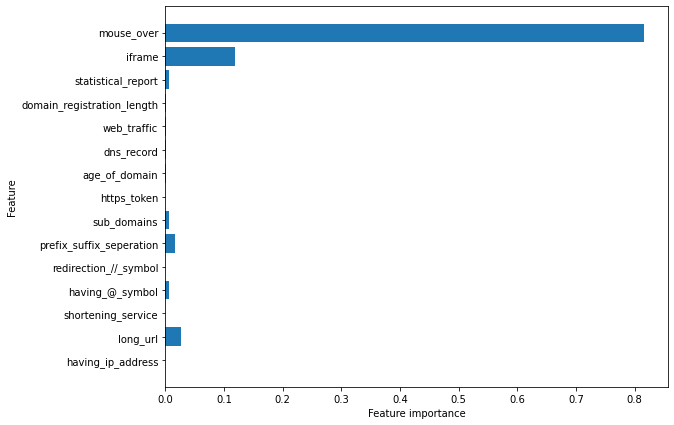

In [ ]:
#checking the feature improtance in the XGBoost model

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()
